# Sentimental analysis of Federal Reserve FOMC meeting minutes using FinBert

## Install FedTools and transformers packages

In [1]:
! pip install FedTools
! pip install transformers
! pip install yfinance
! pip install nltk

     -------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 167.3/167.3 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 126.3/126.3 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 70.4/70.4 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 102.2/102.2 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 10.0/10.0 MB 18.9 MB/s eta 0:00:00
     -------------------------------------- 274.0/274.0 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 5.8 MB/s eta 0:00:00
     ------------------------------------- 285.9/285.9 kB 18.4 MB/s eta 0:00:00
     ------------------------------------- 447.5/447.5 kB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 161.8/161.8 kB ? eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ------------------------------------- 179.6/179.6 kB 11.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 101.1/101.1 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 939.5/939.5 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 3.8/3.8 MB 24.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=9eb3c3e4dff562879930ccbacc9cab35b31b2e9454105d2ceb841f9fe3e63bd7
  Stored in directory: c:\users\bhusa\appdata\local\pip\cache\wheels\8d\0e\f8\48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import packages

In [1]:
from FedTools import MonetaryPolicyCommittee
from FedTools import BeigeBooks
from FedTools import FederalReserveMins
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
import numpy as np
import nltk
from nltk import tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from datetime import date
import time
import yfinance as yf
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime
from pytz import timezone, utc

c:\Users\bhusa\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhusa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhusa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Web Scrap Federal Reserve Open Market Committee Meeting minutes

In [2]:
# Define the detail of scrapping
fed_mins = FederalReserveMins(
            main_url = 'https://www.federalreserve.gov',
            calendar_url ='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 2003,
            historical_split = 2017,
            verbose = True,
            thread_num = 10)

# Put the scrapped result to a DataFrame
dataset = fed_mins.find_minutes()

Constructing links between 2003 and 2024
Extracting Federal Reserve Minutes.
Retrieving articles.
.........................................................................................................................................................................

## Define the natual language processing detail of FinBert

In [18]:
! pip install torch

     ---------------------------------------- 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 25.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch

In [4]:
# Import the pretrained classifer and tokenizer of Bert from FinBert online source
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Build up the NLP pipeline with the pretrained classifer model and tokenizer from above
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

## Divide the dataset into 3 different dataset for easier processing

In [5]:
dataset0313 = dataset[dataset.index < '2014-01-01']
dataset1422 = dataset[(dataset.index > '2013-12-31')&(dataset.index < '2022-12-31')]
dataset2323 = dataset[dataset.index >= '2023-01-01']

## Calculate the positiveness of the meeting minutes
Use nlp setting from above to interate through each sentences of every meeting minutes.
<br> Calculate "(no. of positive sentences - no. of negative sentences)/total number of sentences in a minute" for each minutes <br>
CSV file of positiveness between 2003 to 2022 is provided in github.

### Optional: Calculation of positiveness of 2003 to 2022 (CSV file can be found in Github)

In [ ]:
date_list = dataset0313.index.tolist()
data_positiveness0313 = dataset0313
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness0313.loc[date,"positiveness"]=positiveness
data_positiveness0313.to_csv("positiveness0313.csv")
data_positiveness0313

In [ ]:
date_list = dataset1422.index.tolist()
data_positiveness1422 = dataset1422
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness1422.loc[date,"positiveness"]=positiveness
data_positiveness1422.to_csv("positiveness1422.csv")
data_positiveness1422

### Calculation of positiveness of 2023

In [ ]:
data_positiveness1422 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness1422.csv")
date_list = dataset2323.index.tolist()
data_positiveness2323 = dataset2323
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness2323.loc[date,"positiveness"]=positiveness

data_positiveness2323

## Import the dataset from csv

In [6]:
data_positiveness0313 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness0313.csv")
data_positiveness1422 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness1422.csv")
#Combine all three subset
data_positiveness=pd.concat([data_positiveness0313, data_positiveness1422], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness=pd.concat([data_positiveness, data_positiveness0313], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness.columns.values[0] = "date"
data_positiveness

,date,Federal_Reserve_Mins,positiveness
1970-01-01 00:00:00.000000000,2003-01-29,"The Federal Reserve, the central bank of the U...",0.045643
1970-01-01 00:00:00.000000001,2003-03-18,A meeting of the Federal Open Market Committee...,-0.174863
1970-01-01 00:00:00.000000002,2003-05-06,A meeting of the Federal Open Market Committee...,-0.250891
1970-01-01 00:00:00.000000003,2003-06-25,A meeting of the Federal Open Market Committee...,-0.092429
1970-01-01 00:00:00.000000004,2003-08-12,A meeting of the Federal Open Market Committee...,-0.042229
...,...,...,...
1970-01-01 00:00:00.000000082,2013-06-19,"The Federal Reserve, the central bank of the U...",-0.113725
1970-01-01 00:00:00.000000083,2013-07-31,"The Federal Reserve, the central bank of the U...",-0.031963
1970-01-01 00:00:00.000000084,2013-09-18,"The Federal Reserve, the central bank of the U...",-0.205000
1970-01-01 00:00:00.000000085,2013-10-30,"The Federal Reserve, the central bank of the U...",-0.109649


## Visualization of sentiment of FOMC meeting

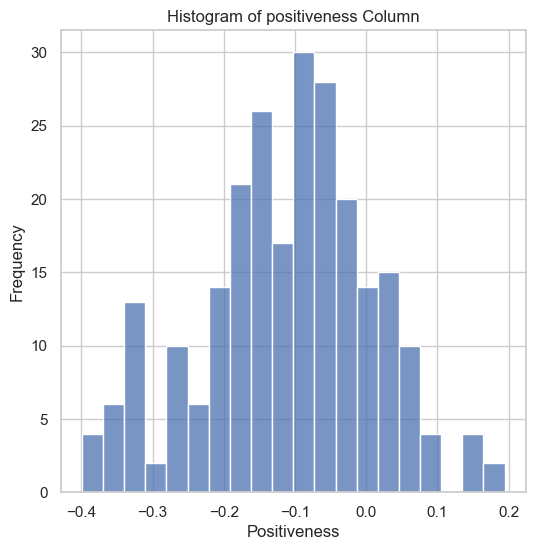

In [61]:
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
# Setting the style for seaborn for the plot
sns.set(style="whitegrid")

# Creating a histogram
sns.histplot(data_positiveness['positiveness'], bins=20, kde=False)

# Giving the histogram a title
plt.title('Histogram of positiveness Column')

# Providing labels
plt.xlabel('Positiveness')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

## Adding Unemployment Rate to Data

In [59]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
unrate_data = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/UNRATE.csv")
unrate_data

,observation_date,UNRATE
0,1/1/2003,5.8
1,2/1/2003,5.9
2,3/1/2003,5.9
3,4/1/2003,6.0
4,5/1/2003,6.1
...,...,...
267,NaN,NaN
268,NaN,NaN
269,NaN,NaN
270,NaN,NaN


In [13]:
! pip install python-dateutil

In [30]:
from dateutil.relativedelta import relativedelta

# Convert dates to datetime format
data_positiveness['date'] = pd.to_datetime(data_positiveness['date'])
unrate_data['observation_date'] = pd.to_datetime(unrate_data['observation_date'])

# Add two months to FOMC meeting dates
data_positiveness['corresponding_date'] = data_positiveness['date'].apply(lambda x: x + relativedelta(months=2))
# data_positiveness['corresponding_date'] = data_positiveness['date'] + relativedelta(months=2)


# Extract only year and month for merging
data_positiveness['merge_key'] = data_positiveness['corresponding_date'].dt.to_period('M')
unrate_data['merge_key'] = unrate_data['observation_date'].dt.to_period('M')

# Merge based on the "merge_key"
merged_data = pd.merge(data_positiveness, unrate_data, on='merge_key', how='left')

# Drop unnecessary columns if needed
merged_data = merged_data.drop(columns=['corresponding_date', 'merge_key', 'observation_date'])
merged_data

,date,Federal_Reserve_Mins,positiveness,UNRATE
0,2003-01-29,"The Federal Reserve, the central bank of the U...",0.045643,5.9
1,2003-03-18,A meeting of the Federal Open Market Committee...,-0.174863,6.1
2,2003-05-06,A meeting of the Federal Open Market Committee...,-0.250891,6.2
3,2003-06-25,A meeting of the Federal Open Market Committee...,-0.092429,6.1
4,2003-08-12,A meeting of the Federal Open Market Committee...,-0.042229,6.0
...,...,...,...,...
241,2013-06-19,"The Federal Reserve, the central bank of the U...",-0.113725,7.2
242,2013-07-31,"The Federal Reserve, the central bank of the U...",-0.031963,7.2
243,2013-09-18,"The Federal Reserve, the central bank of the U...",-0.205000,6.9
244,2013-10-30,"The Federal Reserve, the central bank of the U...",-0.109649,6.7


In [29]:
from scipy import stats
stats.pearsonr (list (merged_data['UNRATE']), list (merged_data['positiveness']))

PearsonRResult(statistic=np.float64(-0.31059474044325364), pvalue=np.float64(6.690328181744995e-07))

## Linear Regression Model

In [44]:
df3 = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
lbls = merged_data['UNRATE']

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [75]:
X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.633563558989419
R-squared: 0.10220666280489621


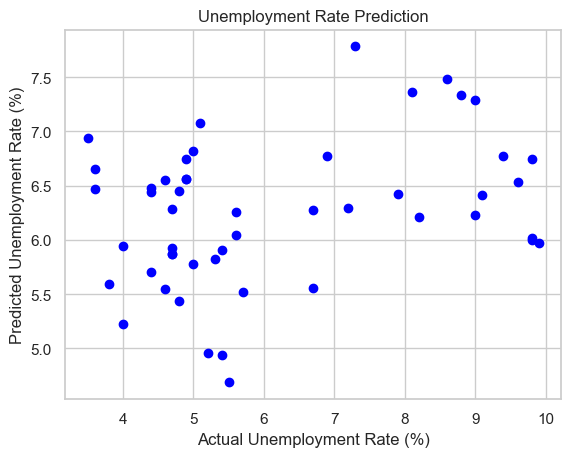

In [76]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## Random Forest Regressor Model

In [77]:
from sklearn.ensemble import RandomForestRegressor

X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.9270305999222814
R-squared: 0.5238626750036861


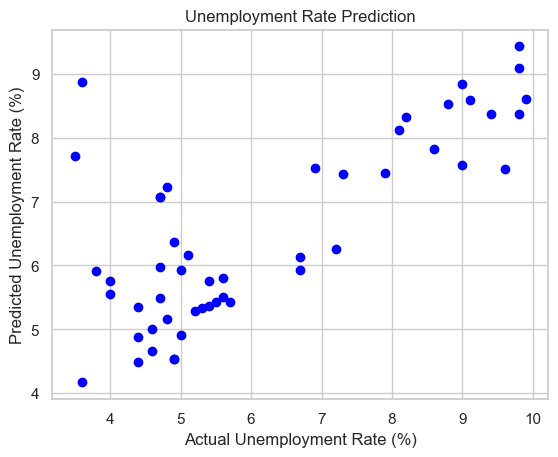

In [78]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## KNN Model

In [79]:
from sklearn.neighbors import KNeighborsRegressor

X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.0931039999999994
R-squared: 0.2357452629165333


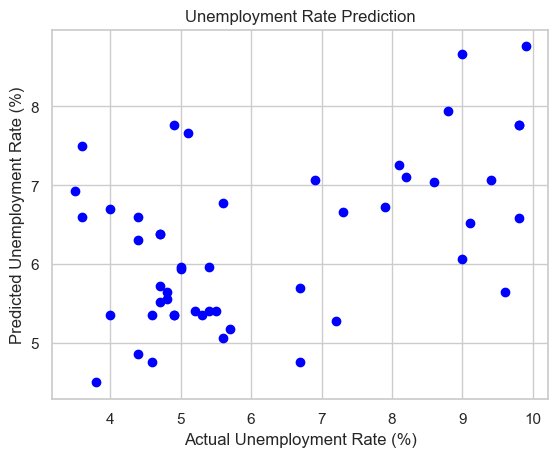

In [80]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## Gradient Boosting Regressor Model

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.8870052612526929
R-squared: 0.5337522728580109


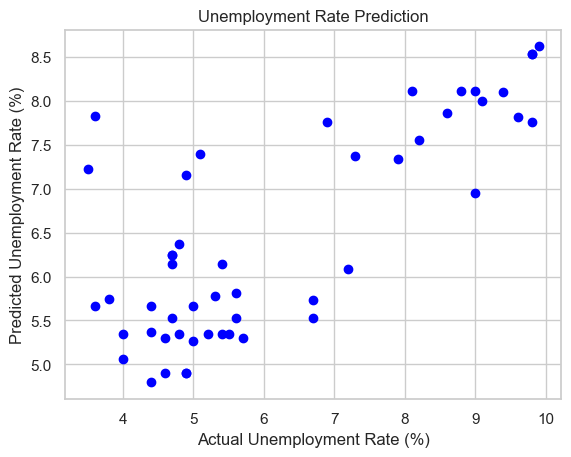

In [82]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## LGBMRegressor Model

In [83]:
from lightgbm import LGBMRegressor
X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=100, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 1
[LightGBM] [Info] Start training from score 6.283673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

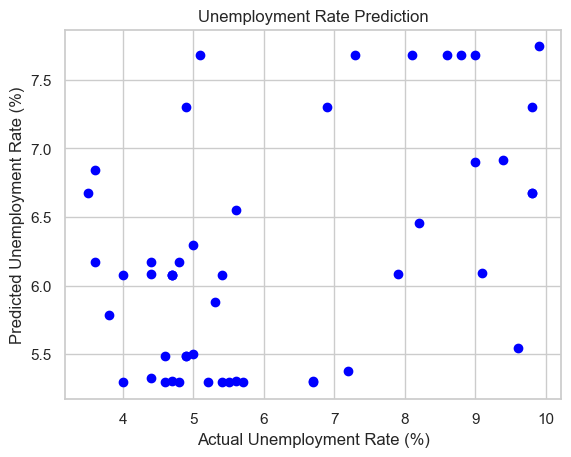

In [84]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## XGBRegressor Model

In [85]:
from xgboost import XGBRegressor
X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.36306566994132
R-squared: 0.6632090627381093


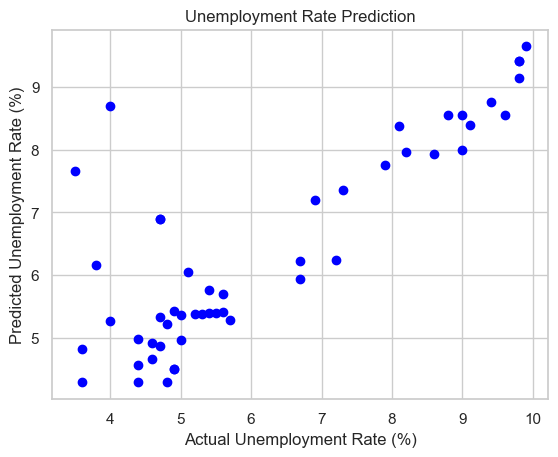

In [86]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()

## Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeRegressor
X = merged_data.drop(columns=['date', 'Federal_Reserve_Mins', 'UNRATE'])
y = merged_data['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.2292545487528344
R-squared: 0.20210471871211355


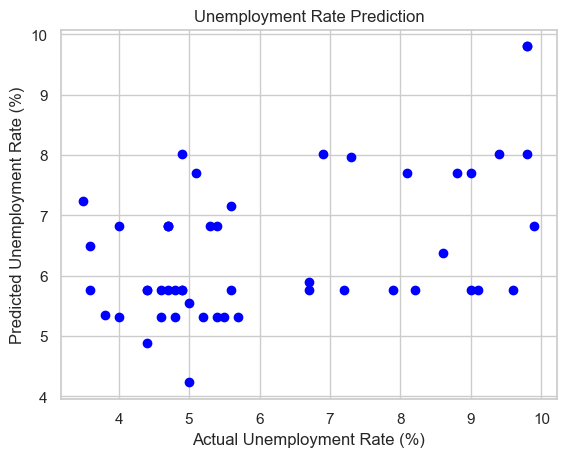

In [88]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.title('Unemployment Rate Prediction')
plt.show()